# Repliement spectral

In [1]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
from IPython.display import Audio

In [2]:
# Signal temporel
fo = 440
d = 0.1
Te = 1/1e4
N = d/Te
n = np.arange(N)
t0 = n*Te;
x0 = np.sin(2*np.pi*fo*t0)

In [3]:
def la(fe):
    
    # Signal temporel
    fo = 440
    d = 5
    Te = 1/fe
    N = d/Te
    n = np.arange(N)
    t = n*Te;
    x = np.sin(2*np.pi*fo*t)
    
    # Spectre
    X = fft.fftshift(fft.fft(x))
    k = np.arange(N) - np.floor(N/2)
    f = k/(N*Te)

    # Affichage
    fig, ax = plt.subplots(1, 3, figsize=(20,5))
    ax[0].plot(t*1e3,x)
    ax[0].set_xlim([0, 100])
    ax[0].set_xlabel("t (ms)")
    ax[1].plot(t0*1e3,x0, "tab:green")
    ax[1].plot(t*1e3,x, color="tab:blue", marker="o")
    ax[1].set_xlim([0, 10])
    ax[1].set_xlabel("t (ms)")
    ax[2].plot(f,np.abs(X))
    ax[2].set_xlim([-650, 650]);
    ax[2].set_xlabel("f (Hz)")
    
    # Interpolation du signal pour avoir une fréquence d'échantillonnage suffisamment grande
    fs = 8000
    M = (d*fs-N)/2
    Y = np.concatenate([np.zeros(int(M)), X, np.zeros(int(M))])
    y = np.real(fft.ifft(fft.ifftshift(Y)))*2
    
    # Lecture du signal audio
    display(Audio(y, rate=fs, autoplay=False))

**Échantillonnage à 8000 Hz**

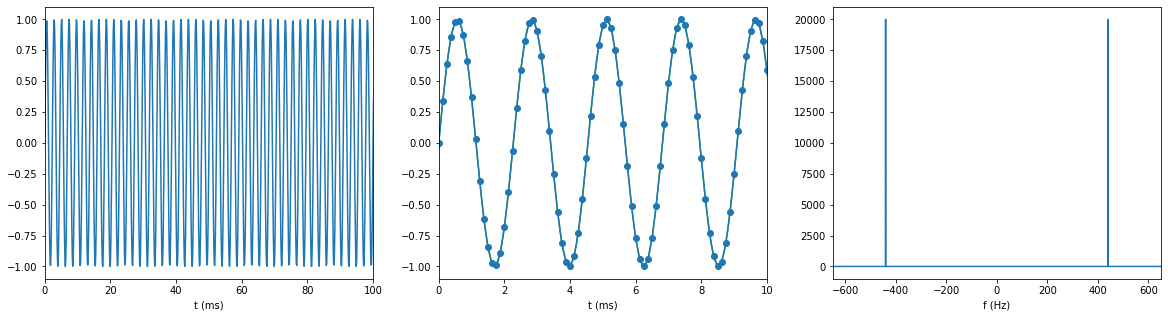

In [4]:
la(8000)

**Échantillonnage à 1000 Hz**

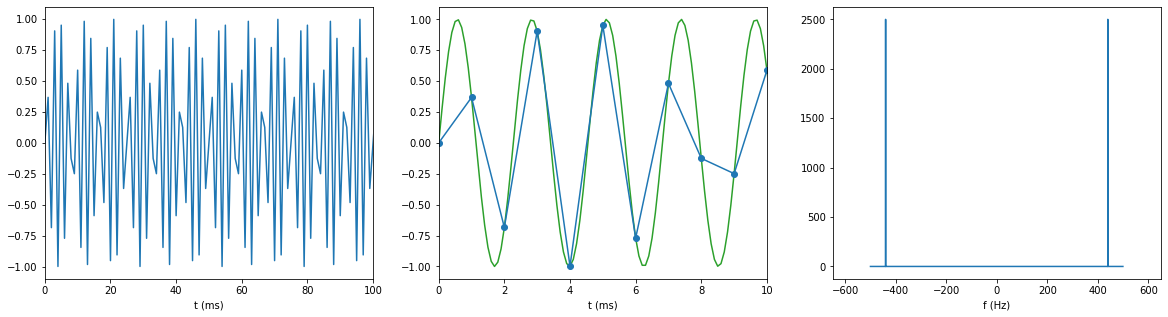

In [5]:
la(1000)

**Échantillonnage à 700 Hz**

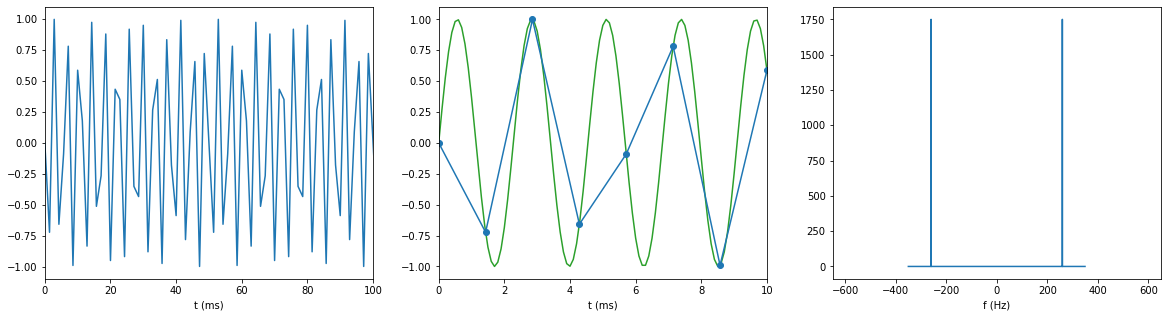

In [6]:
la(700)